<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Classification-Sample-Projects/blob/main/Tabular_Data_TF_Keras_Classification_FFNN_Lending_Club_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - TF.Keras - Classification - FFNN - Lending Club Loan**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/lending_club_loan_two.csv')
df.head(8).transpose()

,0,1,2,3,4,5,6,7
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47
grade,B,B,B,A,C,C,A,B
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0


In [ ]:
# It seems purpose and title features are duplicate.

## 2. Data Overview

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## 3. Exploratory Data Analysis

<Axes: xlabel='loan_amnt', ylabel='Count'>

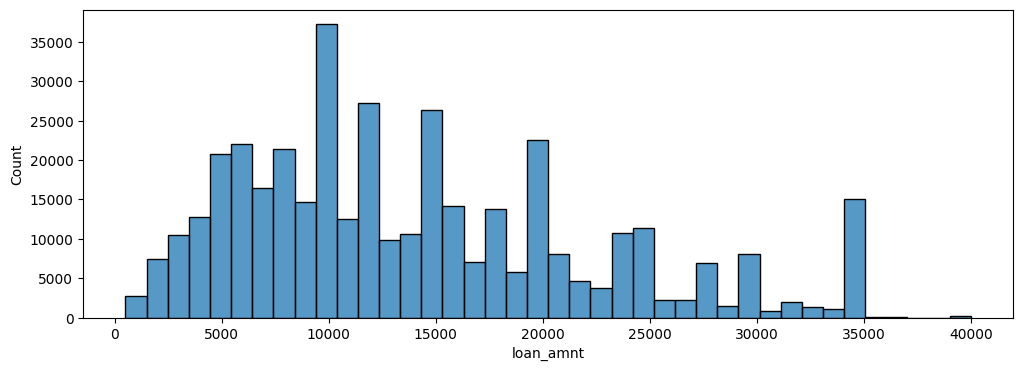

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df['loan_amnt'], kde=False, bins=40)

<Axes: xlabel='installment', ylabel='loan_amnt'>

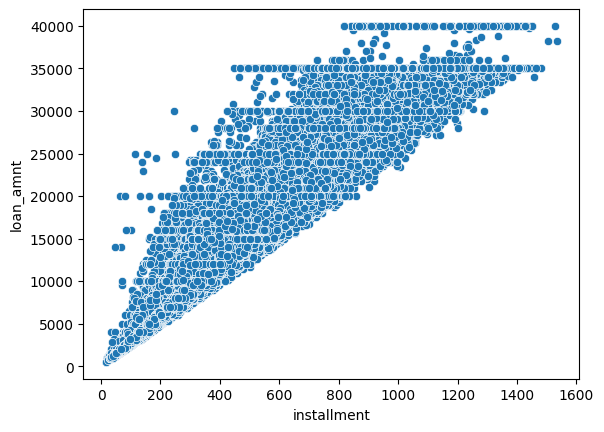

In [ ]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

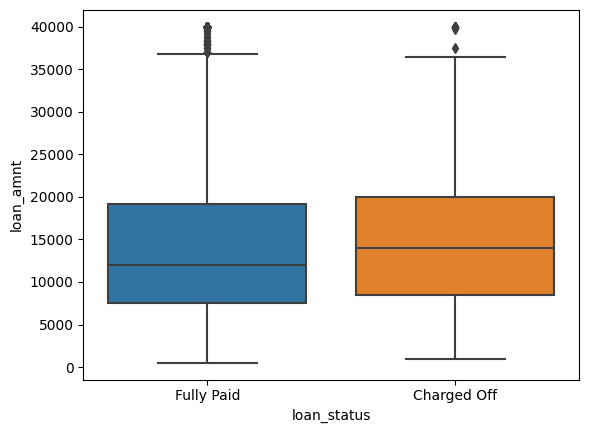

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
df.grade.value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

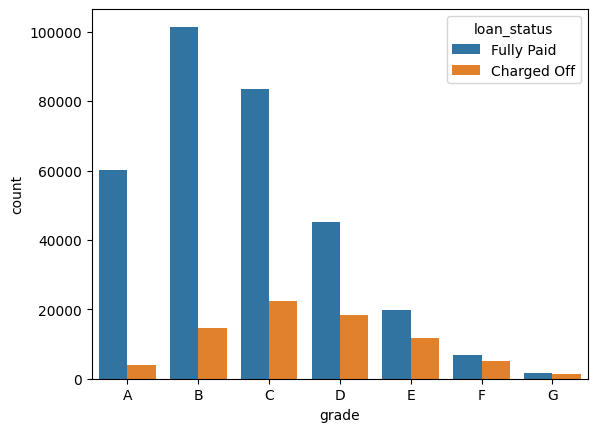

In [ ]:
grade_order = sorted(df['grade'].unique())
sns.countplot(data=df, x='grade', hue='loan_status', order=grade_order)

In [ ]:
df.groupby('grade')['sub_grade'].value_counts()

grade  sub_grade
A      A5           18526
       A4           15789
       A3           10576
       A1            9729
       A2            9567
B      B3           26655
       B4           25601
       B2           22495
       B5           22085
       B1           19182
C      C1           23662
       C2           22580
       C3           21221
       C4           20280
       C5           18244
D      D1           15993
       D2           13951
       D3           12223
       D4           11657
       D5            9700
E      E1            7917
       E2            7431
       E3            6207
       E4            5361
       E5            4572
F      F1            3536
       F2            2766
       F3            2286
       F4            1787
       F5            1397
G      G1            1058
       G2             754
       G3             552
       G4             374
       G5             316
Name: sub_grade, dtype: int64

<Axes: xlabel='sub_grade', ylabel='count'>

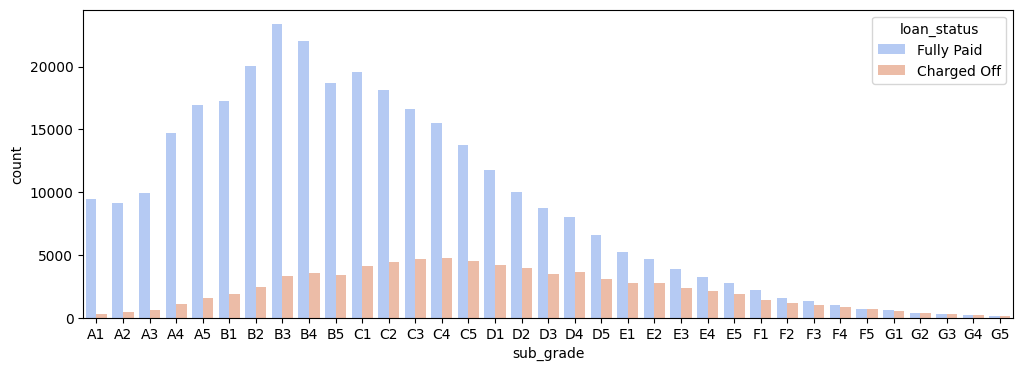

In [ ]:
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order,
              palette='coolwarm', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

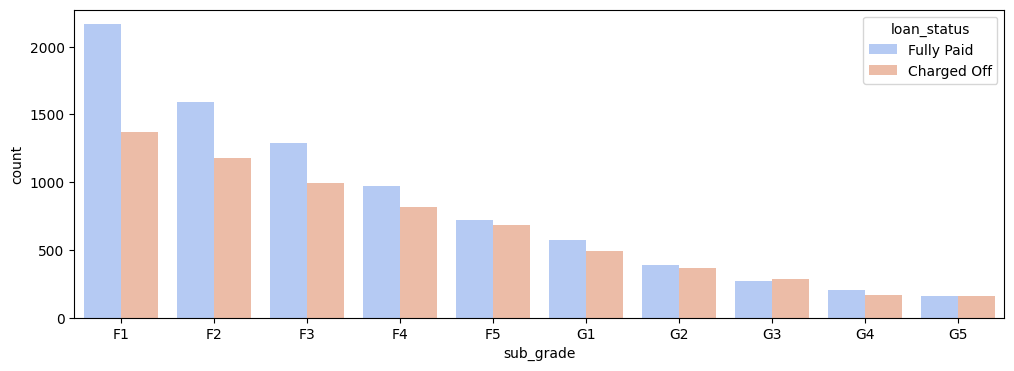

In [ ]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]
plt.figure(figsize=(12, 4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order,
              palette='coolwarm', hue='loan_status')

## 4. Target Variable Preprocessing

In [ ]:
df.loan_status.describe()

count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

In [ ]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<Axes: xlabel='count', ylabel='loan_status'>

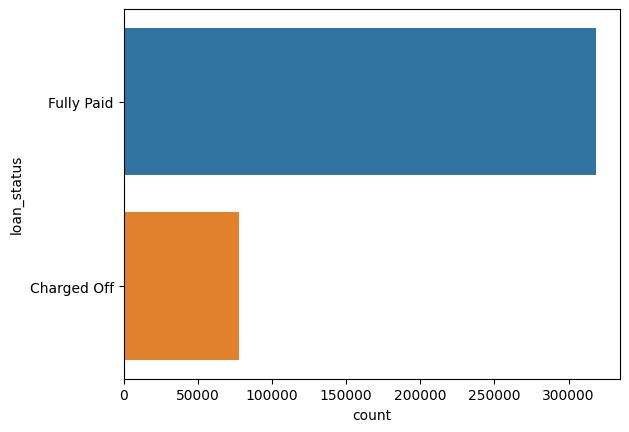

In [ ]:
sns.countplot(data=df, y='loan_status')

In [ ]:
df.loan_status.isnull().sum()

0

In [ ]:
df['Target'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

## 4. Handling Missing Values

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Target                      0
dtype: int64

<Axes: >

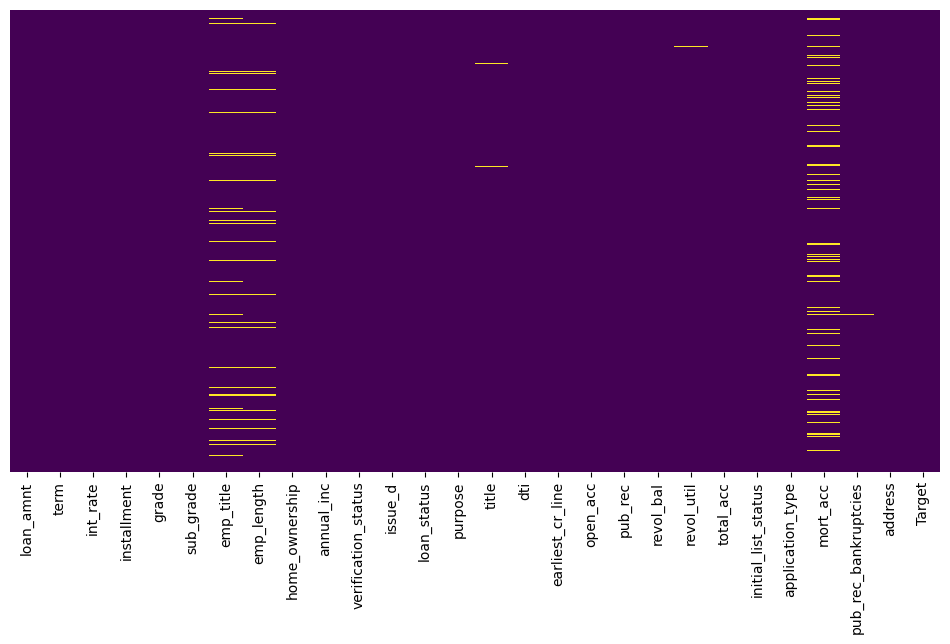

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

> **emp_title**

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['emp_title']

'5.79%'

In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
# Remove variable because of too many unique job titles and too high cardinality
df.drop(columns=['emp_title'], inplace=True)

> **emp_length**

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['emp_length']

'4.62%'

In [ ]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_lenght_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

<Axes: xlabel='emp_length', ylabel='count'>

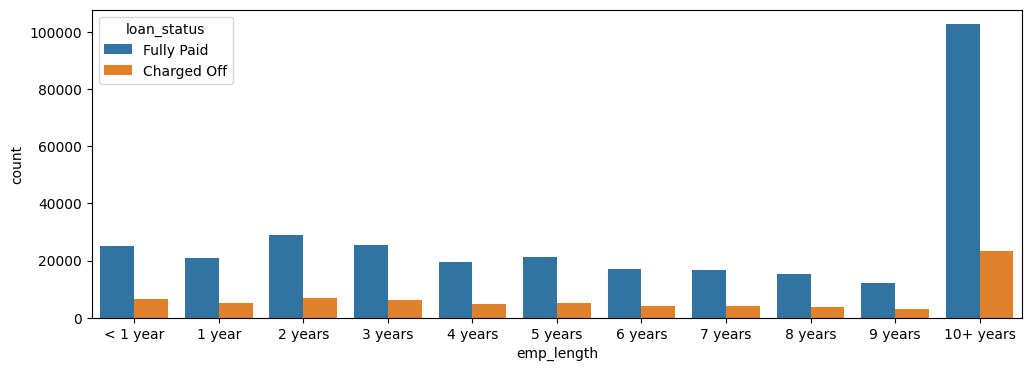

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='emp_length', order=emp_lenght_order, hue='loan_status')

In [ ]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_co/(emp_co + emp_fp)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

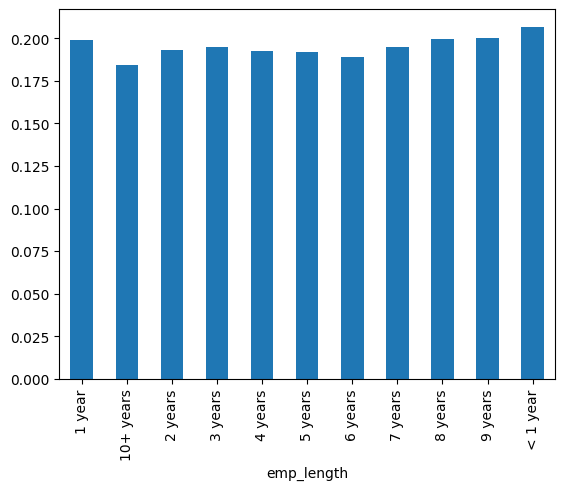

In [ ]:
(emp_co/(emp_co + emp_fp)).plot(kind='bar')

In [ ]:
# Charge off rates are similar across all emp_length and have no information for us. so we drop it.
df.drop(columns=['emp_length'], inplace=True)

> **title**

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['title']

'0.44%'

In [ ]:
df.title.head(15)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
Name: title, dtype: object

In [ ]:
df.purpose.head(15)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
Name: purpose, dtype: object

In [ ]:
# since purpose and title are duplicate, we drop title variable
df.drop(columns=['title'], inplace=True)

> **mort_acc**

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['mort_acc']

'9.54%'

In [ ]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr(numeric_only=True)['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
Target                  0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [ ]:
avg_mort_by_total = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort_by_total[total_acc]
  else:
    return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

> **revol_util**

> **pub_rec_bankruptcies**

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['revol_util']

'0.07%'

In [ ]:
((df.isnull().sum()) / len(df)).map(lambda n: '{:,.2%}'.format(n))['pub_rec_bankruptcies']

'0.14%'

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Target                  0
dtype: int64

## 5. Handling Categorical features

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

> **term**

In [ ]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

> **grade**

In [ ]:
# since grade is part of sub_grade, we drop it.
df.drop(columns=['grade'], inplace=True)

> **sub_grade**

In [ ]:
df.sub_grade.value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['sub_grade'], drop_first=True)

> **verification_status**

In [ ]:
df.verification_status.value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

> **application_type**

In [ ]:
df.application_type.value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['application_type'], drop_first=True)

> **initial_list_status**

In [ ]:
df.initial_list_status.value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=True)

> **purpose**

In [ ]:
df.purpose.value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

> **home_ownership**

In [ ]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [ ]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

> **address**

In [ ]:
df.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
# last 5 digits are zip codes. we create another column called 'zip_code'
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [ ]:
df.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)

In [ ]:
df.drop(columns=['address'], inplace=True)

> **issue_d**

In [ ]:
# issue date is data leakage. we want to predict loan repayment and base on that decide to loan someone or not. so we drop it.
df.drop(columns=['issue_d'], inplace=True)

> **earliest_cr_line**

In [ ]:
df.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## 6. Check Correlations

In [ ]:
df.drop(columns=['loan_status'], inplace=True)

In [ ]:
df.corr()[['Target']].style.background_gradient(cmap='Greens')

,Target
loan_amnt,-0.059731
term,-0.173374
int_rate,-0.247826
installment,-0.040936
annual_inc,0.053545
dti,-0.062390
earliest_cr_line,-0.038907
open_acc,-0.028134
pub_rec,-0.019900
revol_bal,0.010793


## 6. Train_Test_Split

In [ ]:
y = df.Target.values
X = df.drop(columns=['Target']).values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Normalizing the Data

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_val = scaler.transform(X_val)

## 8. Define, Fit Model

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_val, y_val),
          epochs=25, batch_size=256)

Epoch 1/25
1236/1236 [==============================] - 9s 5ms/step - loss: 0.2969 - val_loss: 0.2621
Epoch 2/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2662 - val_loss: 0.2615
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2638 - val_loss: 0.2604
Epoch 4/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2622 - val_loss: 0.2596
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2615 - val_loss: 0.2594
Epoch 6/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2608 - val_loss: 0.2594
Epoch 7/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2604 - val_loss: 0.2589
Epoch 8/25
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2602 - val_loss: 0.2591
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2598 - val_loss: 0.2586
Epoch 10/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.25

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.296887,0.262131
1,0.266158,0.261497
2,0.263799,0.260368
3,0.262234,0.259600
4,0.261539,0.259426
5,0.260810,0.259390
6,0.260378,0.258915
7,0.260231,0.259051
8,0.259790,0.258609
9,0.259528,0.259326


<Axes: >

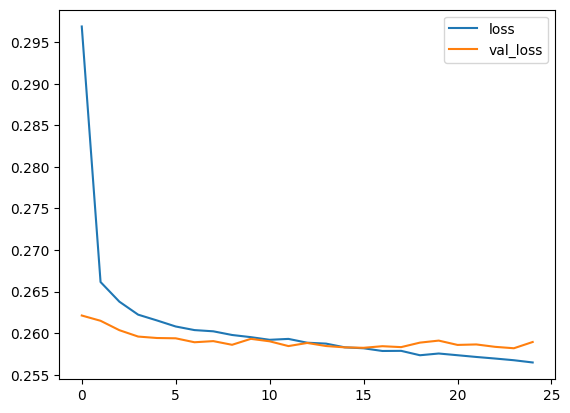

In [ ]:
losses.plot()

## 10. Predict, Evaluate

In [ ]:
predictions = (model.predict(X_val) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 1ms/step


In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_val, predictions))

[[ 6697  8724]
 [   50 63573]]
